In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\train_data_2.csv")

In [3]:
damage_labels = [1, 2, 3]

In [4]:
#Minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [5]:
print(min_count)

25124


In [6]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [7]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
119921,26,39,9133,2,5,16,7,t,u,x,...,0,0,0,0,0,0,0,0,0,1
60782,26,1401,3904,1,5,16,4,t,r,n,...,0,0,0,0,0,0,0,0,0,1
15679,20,1134,5313,2,15,16,4,t,r,q,...,0,0,0,0,0,0,0,0,0,1
83622,13,1258,3158,1,5,7,3,t,r,n,...,0,0,0,0,0,0,0,0,0,1
183491,7,157,1320,2,5,11,5,t,r,x,...,0,0,0,0,0,0,0,0,0,1


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])
train_data["legal_ownership_status"] = encoder.fit_transform(train_data["legal_ownership_status"])

In [10]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
119921,26,39,9133,2,5,16,7,2,3,2,...,0,0,0,0,0,0,0,0,0,1
60782,26,1401,3904,1,5,16,4,2,2,0,...,0,0,0,0,0,0,0,0,0,1
15679,20,1134,5313,2,15,16,4,2,2,1,...,0,0,0,0,0,0,0,0,0,1
83622,13,1258,3158,1,5,7,3,2,2,0,...,0,0,0,0,0,0,0,0,0,1
183491,7,157,1320,2,5,11,5,2,2,2,...,0,0,0,0,0,0,0,0,0,1


In [11]:
train_data = train_data[['count_floors_pre_eq','land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other','legal_ownership_status','count_families','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other','damage_grade']]

In [12]:
train_data.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
119921,2,2,3,2,2,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,1
60782,1,2,2,0,2,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,1
15679,2,2,2,1,0,1,2,9,0,1,...,0,0,0,0,0,0,0,0,0,1
83622,1,2,2,0,0,0,2,2,0,1,...,0,0,0,0,0,0,0,0,0,1
183491,2,2,2,2,2,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
x = train_data.drop(columns=['damage_grade'], axis=1)
y = train_data['damage_grade']

In [14]:
from sklearn.feature_selection import chi2
chi_scores = chi2(x,y)

In [15]:
chi_scores

(array([9.08607683e+02, 6.08773131e+01, 1.93682783e+02, 7.63331740e+03,
        1.34414947e+04, 1.63704559e+02, 5.83296793e+01, 2.86310342e+02,
        1.25677968e+03, 5.74972084e+03, 7.50308966e+02, 4.21050914e+02,
        6.91843278e+02, 7.97390845e+03, 3.86020624e+02, 3.57760202e+02,
        3.95116421e+03, 4.44251482e+03, 1.53707244e+02, 8.66195434e+01,
        1.15649552e+02, 7.62524727e+02, 3.74346430e+02, 1.50536673e+03,
        1.09158067e+03, 1.23136000e+02, 1.96326531e+01, 2.56000000e+01,
        9.33333333e+00, 8.27272727e+00, 8.00000000e-01, 1.53067916e+01]),
 array([4.99284890e-198, 6.03475195e-014, 8.75624724e-043, 0.00000000e+000,
        0.00000000e+000, 2.83143557e-036, 2.15710393e-013, 6.73750694e-063,
        1.24096664e-273, 0.00000000e+000, 1.18162121e-163, 3.71497384e-092,
        5.86328445e-151, 0.00000000e+000, 1.50205764e-084, 2.05759196e-078,
        0.00000000e+000, 0.00000000e+000, 4.19658482e-034, 1.55169064e-019,
        7.70937131e-026, 2.62941639e-166, 

Text(0.5, 1.0, 'Chi Square Test Feature importance score')

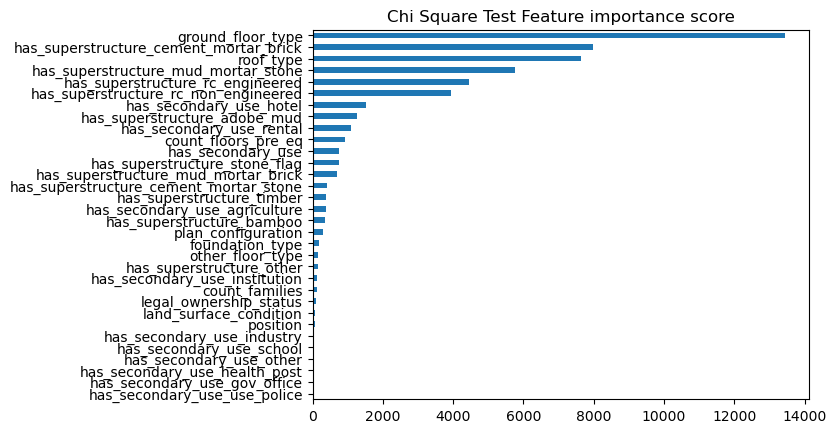

In [17]:
chi_values = pd.Series(chi_scores[0], index=x.columns)
chi_values.sort_values( inplace=True)
chi_values.plot.barh()
plt.title('Chi Square Test Feature importance score')